# Permutaciones Random

Con la ayuda de la función random que importamos al inicio en python, creamos una función que nos genere un vector con valores aleatorios que posteriormente vamos a organizar


In [1]:
import random
import matplotlib.pyplot as plt

def randomPerm(n): #Retorna un vector de numeros random
    v = []
    for i in range(n):
        v.append(i + 1)
    for i in range(len(v) - 1):
        j = random.randint(i, len(v) - 1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v


En este caso se tienen 2 versiones del algoritmo BubbleSort. La clasica y la mejorada donde si el arreglo esta ordenado no hace ningun intercambio y termina el algoritmo de ejecutarse

### Bubble Sort


In [21]:
def bubbleSort(a):
    lista = []
    for i in range(len(a)):
        lista.append(a[i])
    pasos = 0
    for i in range(len(lista)):
        for j in range(0, len(lista)-i-1):
            if lista[j] > lista[j+1] :
                temp = lista[j]
                lista[j] = lista[j+1]
                lista[j+1] = temp
                pasos += 4
    return pasos

### Bubble Sort Mejorado

In [41]:
def bubbleSortM(a):
    lista = []
    for i in range(len(a)):
        lista.append(a[i])
    pasos = 0
    for i in range(len(lista)):
        cont = False
        for j in range(0, len(lista)-i-1):
            if lista[j] > lista[j+1] :
                temp = lista[j]
                lista[j] = lista[j+1]
                lista[j+1] = temp
                cont = True
                pasos += 4
        if cont==False:
            break 
    return pasos

Cabe aclarar que la función de ordenamiento nos devuelve la cantidad de pasos(comparaciones e intercambios) que tuvo que realizar el algoritmo para encontrar la solución. Y partir de eso se sacan algunas estadísticas como la cantidad minima, máxima y promedio de pasos para ordenar el vector generado aleatoriamente

### Bubble Sort

In [43]:
n = int(input("Cantidad de elementos a ordenar: "))
runs = int(input("Numero de permutaciones: "))
lista1 = []
listar = []
for i in range(runs):
    rand = randomPerm(n)
    listar.append(rand)
    t = bubbleSort(rand)
    lista1.append(t)

total = sum(lista1)/runs
minimo = min(lista1)
maximo = max(lista1)
print("Numero minimo de instrucciones: %d" % minimo)
print("Numero maximo de instrucciones: %d" % maximo)
print("Numero promedio de instrucciones: %d" % total)

Cantidad de elementos a ordenar: 20
Numero de permutaciones: 40
Numero minimo de instrucciones: 276
Numero maximo de instrucciones: 464
Numero promedio de instrucciones: 365


### Bubble Sort Mejorado

In [44]:
lista2 = []
for i in range(runs):
    t = bubbleSortM(listar[i])
    lista2.append(t)

total = sum(lista2)/runs
minimo = min(lista2)
maximo = max(lista2)
print("Numero minimo de instrucciones: %d" % minimo)
print("Numero maximo de instrucciones: %d" % maximo)
print("Numero promedio de instrucciones: %d" % total)

Numero minimo de instrucciones: 276
Numero maximo de instrucciones: 464
Numero promedio de instrucciones: 365


Como ultimo paso se gráficara la distribución del numero de pasos empleados en ambos algoritmos

### Bubble Sort

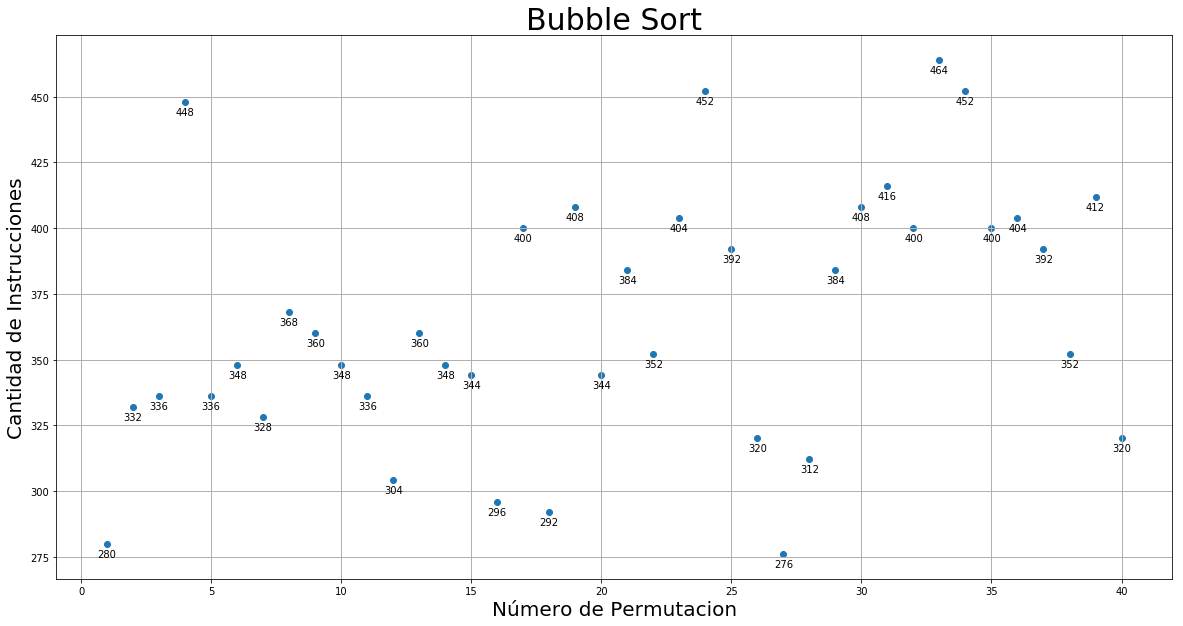

In [48]:
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Número de Permutacion',fontsize=20)
ax.set_ylabel('Cantidad de Instrucciones',fontsize=20)
ax.set_title("Bubble Sort",fontsize=30)
ax.grid( linestyle='-', linewidth=1)
gra=[x for x in range(1,len(lista1)+1)]
ax.scatter(gra,lista1)
for i,txt in enumerate(gra):
    ax.annotate(lista1[i], (gra[i],lista1[i]),va='bottom',ha='center',xytext=(0, -15),textcoords='offset points')
    
plt.show()

### Bubble Sort Mejorado

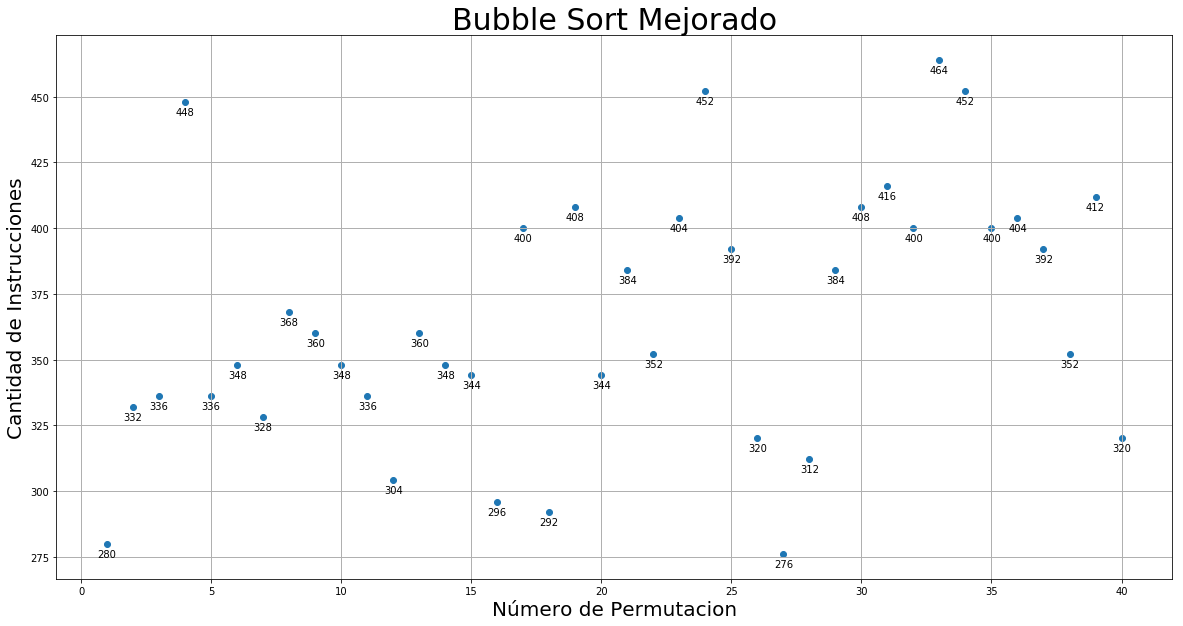

In [49]:
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Número de Permutacion',fontsize=20)
ax.set_ylabel('Cantidad de Instrucciones',fontsize=20)
ax.set_title("Bubble Sort Mejorado",fontsize=30)
ax.grid( linestyle='-', linewidth=1)
gra=[x for x in range(1,len(lista2)+1)]
ax.scatter(gra,lista2)
for i,txt in enumerate(gra):
    ax.annotate(lista2[i], (gra[i],lista2[i]),va='bottom',ha='center',xytext=(0, -15),textcoords='offset points')
    
plt.show()

Las gráficas en este caso son iguales, pero podrian variar en el caso de que un arreglo que se va a ordenar ya este ordenado. Ya que en el segundo caso por la optimización que se le hizo el numero de pasos a contar es de 0. (Aunque cabe aclarar que es un caso poco probable que ocurra)

Ahora para facilidad de visualizacion de la informacion se creara los histogramas correspondientes


### Bubble Sort

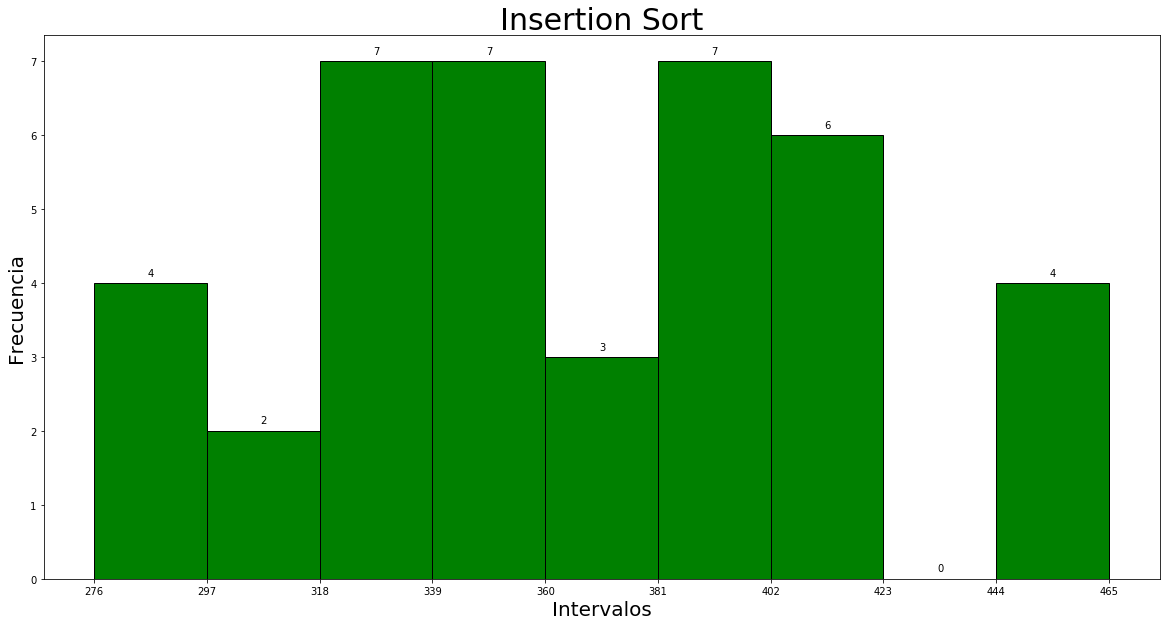

In [50]:
import math
import numpy as np
total= maximo-minimo
cantidad = math.ceil(1 + 3.3 *math.log10(total))
amplitud = math.ceil(total/cantidad)
alturas = []
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Intervalos',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
ax.set_title("Bubble Sort",fontsize=30)
ax.set_xticks([x for x in range(minimo,maximo+amplitud,amplitud)])
bins = [x for x in range(minimo,maximo+amplitud,amplitud)]
ax.hist(lista1,bins,histtype='bar',edgecolor="black",color="green")
for i in ax.patches:
    a = int(i.get_height())
    alturas.append(a)
    ax.text(i.get_x()+10, i.get_height()+0.1,a)
plt.show()

### Bubble Sort Mejorado

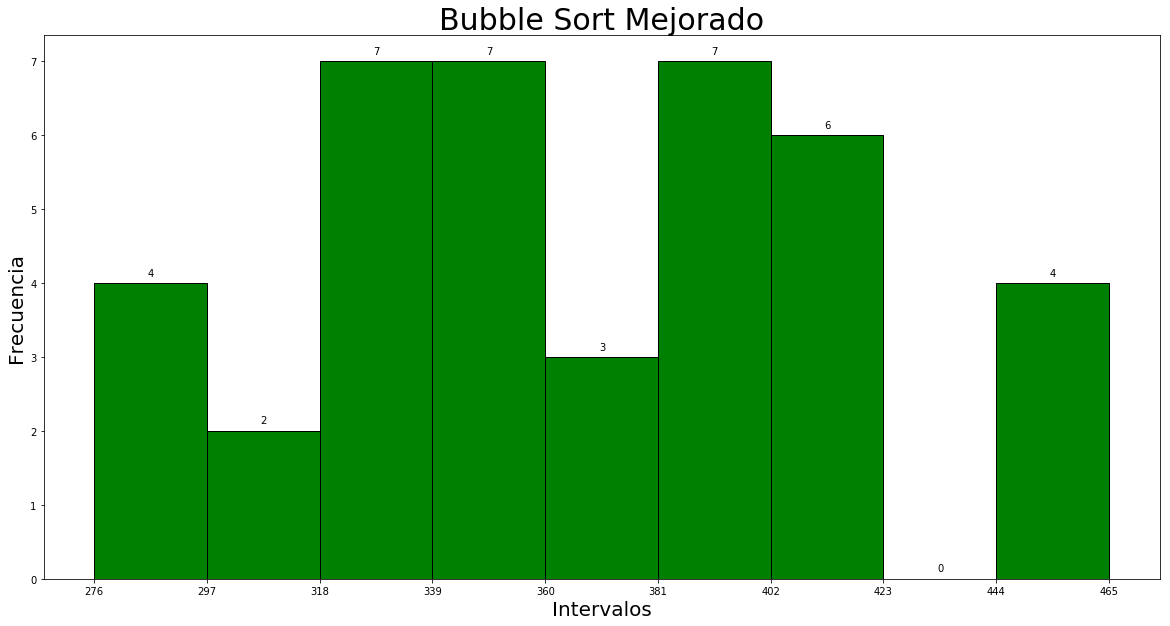

In [52]:
import math
import numpy as np
total= maximo-minimo
cantidad = math.ceil(1 + 3.3 *math.log10(total))
amplitud = math.ceil(total/cantidad)
alturas = []
figura = plt.figure(figsize=(20,10))
ax = figura.add_subplot(111)
ax.set_xlabel('Intervalos',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
ax.set_title("Bubble Sort Mejorado",fontsize=30)
ax.set_xticks([x for x in range(minimo,maximo+amplitud,amplitud)])
bins = [x for x in range(minimo,maximo+amplitud,amplitud)]
ax.hist(lista2,bins,histtype='bar',edgecolor="black",color="green")
for i in ax.patches:
    a = int(i.get_height())
    alturas.append(a)
    ax.text(i.get_x()+10, i.get_height()+0.1,a)
plt.show()

Por último se creara un gráfico que muestra la probabilidad de que el numero de pasos necesarios para realizar bubble sort este dentro de alguno de los anteriores intervalos.OBviamente para cada una de las versiones existente

### Bubble Sort:

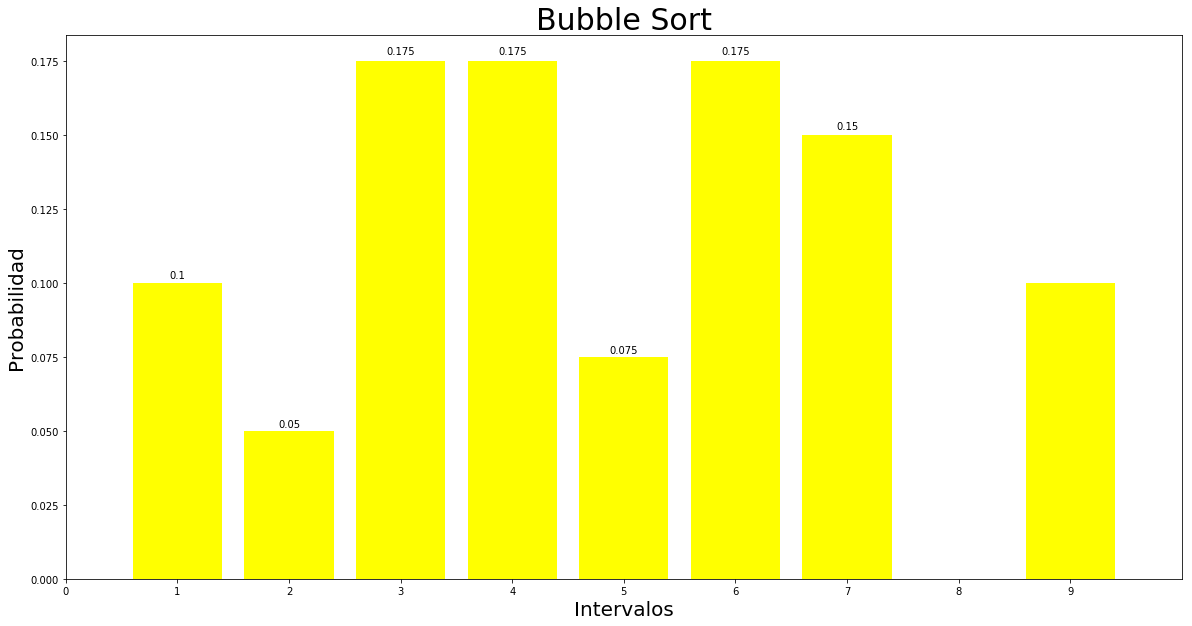

In [56]:
aux=[]
for i in range(len(alturas)):
    aux.append(alturas[i]/sum(alturas))
figura = plt.figure(figsize=(20,10))
mx = figura.add_subplot(111)
mx.set_xlabel('Intervalos',fontsize=20)
mx.set_ylabel('Probabilidad',fontsize=20)
mx.set_title("Bubble Sort",fontsize=30)
mx.set_xticks([x for x in range(0,len(aux)+1)])
plt.xlim(0,cantidad+1)
rect = mx.bar([x for x in range(1,len(aux)+1)],aux,color="yellow")
for i in rect:
    height = i.get_height()
    if height==0.0:
        break
    mx.text(i.get_x() + i.get_width()/2., 1.01*height,height,ha='center', va='bottom')
plt.show()

### Bubble Sort Mejorado

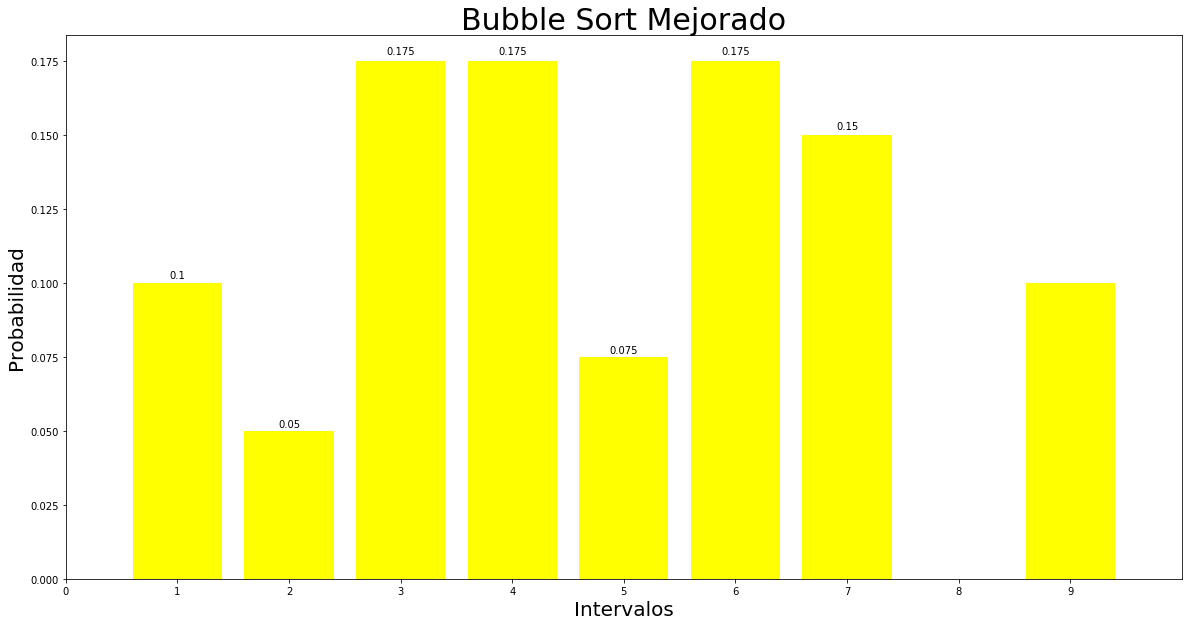

In [57]:
aux=[]
for i in range(len(alturas)):
    aux.append(alturas[i]/sum(alturas))
figura = plt.figure(figsize=(20,10))
mx = figura.add_subplot(111)
mx.set_xlabel('Intervalos',fontsize=20)
mx.set_ylabel('Probabilidad',fontsize=20)
mx.set_title("Bubble Sort Mejorado",fontsize=30)
mx.set_xticks([x for x in range(0,len(aux)+1)])
plt.xlim(0,cantidad+1)
rect = mx.bar([x for x in range(1,len(aux)+1)],aux,color="yellow")
for i in rect:
    height = i.get_height()
    if height==0.0:
        break
    mx.text(i.get_x() + i.get_width()/2., 1.01*height,height,ha='center', va='bottom')
plt.show()